<a href="https://colab.research.google.com/github/vkjdinesh/Reseacrh/blob/main/Reportmeeting_Feb6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from PIL import Image
from socket import socket
import seaborn as sns
#library
import os
import cv2
import glob
import matplotlib.pyplot as plt 
from tensorflow.keras.applications import InceptionV3
import numpy
import numpy as np
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
import numpy as np
import  scipy
import numpy as np
from scipy.linalg import sqrtm
import cmath

In [3]:
#select the specific digits

import tensorflow as tf

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Filter for a specific digit
digit_to_filter = 5
x_train = x_train[y_train == digit_to_filter]
y_train = y_train[y_train == digit_to_filter]
x_test= x_test[y_test == digit_to_filter]
y_test = y_test[y_test == digit_to_filter]

In [4]:
!pip install mnist
import mnist


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
train_images = mnist.train_images() 
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [6]:

import numpy as np


digitDict = {}

for i in range(10):
    mask = (train_labels == i)
    digitDict[i] = train_images[mask]

for i in range(10):
    print("Digit {0} matrix shape: {1}".format(i,digitDict[i].shape))

Digit 0 matrix shape: (5923, 28, 28)
Digit 1 matrix shape: (6742, 28, 28)
Digit 2 matrix shape: (5958, 28, 28)
Digit 3 matrix shape: (6131, 28, 28)
Digit 4 matrix shape: (5842, 28, 28)
Digit 5 matrix shape: (5421, 28, 28)
Digit 6 matrix shape: (5918, 28, 28)
Digit 7 matrix shape: (6265, 28, 28)
Digit 8 matrix shape: (5851, 28, 28)
Digit 9 matrix shape: (5949, 28, 28)


(5421, 28, 28)

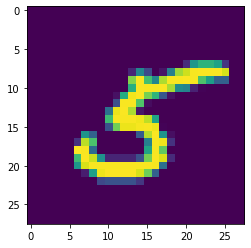

In [7]:
#labels
some_digit = x_train[10]
some_digit_show = plt.imshow(x_train[10].reshape(28,28))
x_train.shape

In [40]:
#MNIST-DCGAN-FID
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

class DCGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 128)))
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
        model.add(Activation("tanh"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, save_interval=50):
        import tensorflow as tf
        # Load the dataset
        #(X_train, _), (_, _) = mnist.load_data()
        # Load the MNIST dataset
        mnist = tf.keras.datasets.mnist
        (X_train, y_train), (x_test, y_test) = mnist.load_data()

        # Filter for a specific digit
        digit_to_filter = 5
        X_train = X_train[y_train == digit_to_filter]
        y_train = y_train[y_train == digit_to_filter]
        x_test= x_test[y_test == digit_to_filter]
        y_test = y_test[y_test == digit_to_filter]

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Train the generator (wants discriminator to mistake images as real)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)
    def save_imgs(self, epoch):
        r, c = 2,2
        #noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images/mnist_%d.png" % epoch)
        plt.close()



In [15]:
if __name__ == '__main__':
    dcgan = DCGAN()
    dcgan.train(epochs=1000, batch_size=32, save_interval=20)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 14, 14, 32)        0         
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 8, 8, 64)         0         
 ng2D)                                                           
                                                                 
 batch_normalization_5 (Batc  (None, 8, 8, 64)         256       
 hNormalization)                                      

In [8]:
mnist_images1 = x_train[0:1500]
print(len(mnist_images1))

1500


In [9]:
mnist_path = "/content/images"
mnist_images = os.listdir(mnist_path)

In [10]:
mnitimg_data=[]
for img in mnist_images:
    img_arr=cv2.imread(os.path.join(mnist_path,img))
    mnitimg_data.append(img_arr)

In [11]:
mnist_images2 = mnitimg_data[0:10]
len(mnist_images2)

10

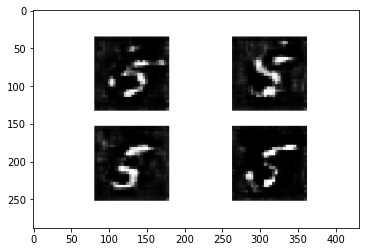

In [12]:
for i in range(len(mnitimg_data[40:41])):
    plt.subplot(1,1,i+1)
    plt.imshow(mnitimg_data[i])

In [8]:
#change the size
def scale_images(images, new_shape):
    images_list = list()
    for image in images:
        # resize with nearest neighbor interpolation
        new_image = resize(image, new_shape, 0)
        images_list.append(new_image)
    return asarray(images_list)

In [16]:
# calculate the FID
def calculate_fid(model, images1, images2):
    # feature extraction
    act1 = model.predict(images1)
    act2 = model.predict(images2)
    # calculate mean and covariance 
    mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
    # calculate sum squared difference between means
    ssdiff = numpy.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    if iscomplexobj(covmean):
        covmean = covmean.real
    # calculate score
    fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

In [17]:
#inception model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))

In [19]:
print(mnist_images1.shape)


(1500, 28, 28)


In [20]:

# resize images
mnist_images1 = scale_images(mnist_images1, (299,299,3))
mnist_images2 = scale_images(mnist_images2, (299,299,3))
print('Scaled', mnist_images1.shape, mnist_images2.shape)
# pre-process images
mnist_images1 = preprocess_input(mnist_images1)
mnist_images2= preprocess_input(mnist_images2)

In [21]:
print(mnist_images1.shape[0])
print(mnist_images2.shape[0])

1500
10


In [20]:
#calculate the FID
calculate_fid(model, mnist_images1, mnist_images2)

1/1 [==============================] - 2s 2s/step


59.5330208533327

In [ ]:
#images1 = 1000
#images 2= 50

In [22]:
#calculate the FID
calculate_fid(model, mnist_images1, mnist_images2)

1/1 [==============================] - 2s 2s/step


59.47287987069939

In [26]:
calculate_fid(model, mnist_images1, mnist_images1[1:4999])

47/47 [==============================] - 306s 7s/step


0.00015355933418037665

In [1]:
from math import floor
from numpy import ones
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import std
from numpy import exp
from numpy.random import shuffle
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets import cifar10
from skimage.transform import resize
from numpy import asarray
 

In [2]:
#Inception score

def calculate_inception_score(images, n_split=10, eps=1E-16):
 # load inception v3 model
    model = InceptionV3()
 # enumerate splits of images/predictions
    scores = list()
    n_part = floor(images.shape[0] / n_split)
    for i in range(n_split):
 # retrieve images
        ix_start, ix_end = i * n_part, (i+1) * n_part
        subset = images[ix_start:ix_end]
 # convert from uint8 to float32
        subset = subset.astype('float32')
 # scale images to the required size
        subset = scale_images(subset, (299,299,3))
 # pre-process images, scale to [-1,1]
        subset = preprocess_input(subset)
 # predict p(y|x)
        p_yx = model.predict(subset)
 # calculate p(y)
        p_y = expand_dims(p_yx.mean(axis=0), 0)
 # calculate KL divergence using log probabilities
        kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
 # sum over classes
        sum_kl_d = kl_d.sum(axis=1)
 # average over images
        avg_kl_d = mean(sum_kl_d)
 # undo the log
        is_score = exp(avg_kl_d)
 # store
        scores.append(is_score)
 # average across images
        is_avg, is_std = mean(scores), std(scores)
    return is_avg, is_std

In [ ]:
images = mnitimg_data[0:50]
# resize images
images = scale_images(images, (299,299,3))
#mnist_images2 = scale_images(mnist_images2, (299,299,3))
print('Scaled', images.shape)
# pre-process images
images = preprocess_input(images)
#mnist_images2= preprocess_input(mnist_images2)

In [38]:

# calculate inception score
is_avg, is_std = calculate_inception_score(images)
print('score', is_avg, is_std)

2/2 [==============================] - 11s 4s/step
score 1.0000001 0.0


In [42]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (x_test, y_test) = mnist.load_data()
images1=X_train[1:1000]

In [43]:
# resize images
images1 = scale_images(images1, (299,299,3))
#mnist_images2 = scale_images(mnist_images2, (299,299,3))
print('Scaled', images1.shape)
# pre-process images
images1 = preprocess_input(images1)
#mnist_images2= preprocess_input(mnist_images2)

Scaled (999, 299, 299, 3)


In [46]:

# calculate inception score
is_avg, is_std = calculate_inception_score(images1)
print('score', is_avg, is_std)

4/4 [==============================] - 20s 4s/step
score 1.0000002 1.1309186e-07


In [10]:
#images from drive
import os
import glob
import cv2
# Path to folder containing images
#folder path
path = "/content/drive/MyDrive/animals/raw-img/scoiattolo"


In [8]:
images = os.listdir(path)

In [11]:
#create a list 
img_data=[]
for img in images:
    img_arr=cv2.imread(os.path.join(path,img))
    img_data.append(img_arr)

In [12]:
#check the len
print(len(img_data))
print(type(img_data))

1863
<class 'list'>


In [13]:
#select the images for FID
images_an = img_data[1:1500]
#images2 = img_data[1:3]
print(len(images_an))
#print(len(images2))
# convert integer to floating point values
#images1 = float(files)
#images2 = images2.astype('float32')


1499


In [18]:
#resize and preprocess
images_an = scale_images(images_an, (299,299,3))
#images2 = scale_images(images2, (299,299,3))
print('Scaled', images_an.shape)
# pre-process images
images_an = preprocess_input(images_an)
#images2 = preprocess_input(images2)

Scaled (1499, 299, 299, 3)


In [22]:
# calculate inception score
is_avg, is_std = calculate_inception_score(images_an)
print('score', is_avg, is_std)

5/5 [==============================] - 30s 6s/step
score 1.0000002 1.1920929e-07


In [4]:
# load cifar10 images
(images, _), (_, _) = cifar10.load_data()
# shuffle images
#shuffle(images)

In [6]:
images = images[0:1500]

In [9]:
#resize and preprocess
images= scale_images(images, (299,299,3))
#images2 = scale_images(images2, (299,299,3))
print('Scaled', images.shape)
# pre-process images
images= preprocess_input(images)
#images2 = preprocess_input(images2)

Scaled (1500, 299, 299, 3)


In [10]:
# calculate inception score
is_avg, is_std = calculate_inception_score(images)
print('score', is_avg, is_std)

5/5 [==============================] - 32s 6s/step
score 1.0000001 7.5394574e-08
